In [2]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

In [3]:
table_viewersCount = pd.read_html('https://en.wikipedia.org/wiki/The_Simpsons')

In [4]:
print(f'Total tables: {len(table_viewersCount)}')
# Three level table
viewer_df = table_viewersCount[1]
viewer_df.columns = viewer_df.columns.droplevel()
viewer_df.columns = viewer_df.columns.droplevel()
for col in viewer_df.columns: 
    print(col)

Total tables: 27
Season
Season.1
No. ofepisodes
Season premiere
Season finale
Time Slot (ET)
Avg. viewers(in millions)
Viewers(millions)
Episode Title


In [5]:
viewer_df = viewer_df.rename(columns={"Season": "Season_Number", "Season.1": "Year(s)", "No. ofepisodes": "Number_of_Episodes", 
                          "Season premiere" : "Season premiere", "Season finale":"Season finale", 
                          "Time Slot (ET)" : "Time Slot(EST)", "Avg. viewers(in millions)" : "Average_Ep_Viewers_in_mil",
                          "Viewers(millions)" : "Most_Watched_Ep_Viewers_in_mil", "Episode Title" : "Episode_Title"})

viewer_df['Average_Ep_Viewers_in_mil'] = viewer_df['Average_Ep_Viewers_in_mil'].str[:4]
viewer_df = viewer_df.fillna(0)
viewer_df = viewer_df.replace('TB', '0')
viewer_df = viewer_df.replace('TBA', '0')
viewer_df['Average_Ep_Viewers_in_mil'] = viewer_df['Average_Ep_Viewers_in_mil'].str.strip('[').astype(float)
viewer_df[0:50]

,Season_Number,Year(s),Number_of_Episodes,Season premiere,Season finale,Time Slot(EST),Average_Ep_Viewers_in_mil,Most_Watched_Ep_Viewers_in_mil,Episode_Title
0,1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,27.80,33.5,"""Life on the Fast Lane"""
1,2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,24.40,33.6,"""Bart Gets an F"""
2,3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,21.80,25.5,"""Colonel Homer"""
3,4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 pm,22.40,28.6,"""Lisa's First Word"""
4,5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 pm,18.90,24.0,"""Treehouse of Horror IV"""
5,6,1994–95,25,"September 4, 1994","May 21, 1995",Sunday 8:00 pm,15.60,22.2,"""Treehouse of Horror V"""
6,7,1995–96,25,"September 17, 1995","May 19, 1996",Sunday 8:00 pm,15.10,19.7,"""Treehouse of Horror VI"""
7,8,1996–97,25,"October 27, 1996","May 18, 1997",Sunday 8:30 pm (Episodes 1–3)Sunday 8:00 pm (E...,14.50,20.9,"""The Springfield Files"""
8,9,1997–98,25,"September 21, 1997","May 17, 1998",Sunday 8:00 pm,15.30,19.8,"""The Two Mrs. Nahasapeemapetilons"""
9,10,1998–99,23,"August 23, 1998","May 16, 1999",Sunday 8:00 pm,13.50,15.5,"""Maximum Homerdrive"""


In [6]:
#viewer_df = viewer_df.replace('[', '')
#viewer_df['Average Ep Viewers(mil)']=viewer_df['Average Ep Viewers(mil)'].str[:2]
#viewer_df[0:50]

In [7]:
table_ratings = pd.read_html('https://en.wikipedia.org/wiki/List_of_The_Simpsons_episodes')
rating_df = table_ratings[0]


In [8]:
rating_df.columns = rating_df.columns.droplevel()
for col in rating_df.columns: 
    print(col)


Season
Season.1
Episodes
Episodes.1
First aired
Last aired
Households / viewers
Rank
Rating


In [9]:
rating_df = rating_df.rename(columns={"Season" : "Extra Column", "Season.1" : "Season_Number", "Episodes" : "Number_of_Episodes", 
                          "Episodes.1" : "Season Prem", "First aired" : "First aired", "Last aired" : "Last aired",
                          "Households / viewers" : "Total Household Viewers", "Rank" : "Season_Rank", "Rating" : "Rating"})

rating_df['Season_Rank']=rating_df['Season_Rank'].str[:2]
rating_df['Number_of_Episodes']=rating_df['Number_of_Episodes'].str[:2]
rating_df['Season_Rank']=rating_df['Season_Rank'].str[:2]
rating_df['Season Prem']=rating_df['Season Prem'].str[:2]
rating_df = rating_df.fillna(0)
rating_df = rating_df.replace('TB', '0')
rating_df = rating_df.replace('TBA', '0')
rating_df = rating_df.drop([33, 24, 18])
rating_df.reset_index()

rating_df[0:50]

#ratingFiltered_df = rating_df[["Season", "Households / viewers", "Rank", "Rating"]]

,Extra Column,Season_Number,Number_of_Episodes,Season Prem,First aired,Last aired,Total Household Viewers,Season_Rank,Rating
0,0.0,1,13,13,"December 17, 1989","May 13, 1990",13.4m h.[n1][16],30,14.5
1,0.0,2,22,22,"October 11, 1990","July 11, 1991",12.2m h.[n1][n2],38,0
2,0.0,3,24,24,"September 19, 1991","August 27, 1992",12.0m h.[n1][n3],33,0
3,0.0,4,22,22,"September 24, 1992","May 13, 1993",12.1m h.[n1][25],30,13.0
4,0.0,5,22,22,"September 30, 1993","May 19, 1994",10.5m h.[n1][n4],53,0
5,0.0,6,25,25,"September 4, 1994","May 21, 1995",9.0m h.[n1][27],67,0
6,0.0,7,25,25,"September 17, 1995","May 19, 1996",8.0m h.[n1][28],75,0
7,0.0,8,25,25,"October 27, 1996","May 18, 1997",8.6m h.[29],53,0
8,0.0,9,25,25,"September 21, 1997","May 17, 1998",9.1m h.[30],30,9.2
9,0.0,10,23,23,"August 23, 1998","May 16, 1999",7.9m h.[31],46,0


In [10]:
viewerNormalized_df = viewer_df[["Season_Number", "Number_of_Episodes", "Average_Ep_Viewers_in_mil", 
                                 "Most_Watched_Ep_Viewers_in_mil", "Episode_Title"]]
viewerNormalized_df = viewerNormalized_df.astype({'Number_of_Episodes': 'int32'})
viewerNormalized_df = viewerNormalized_df.astype({'Average_Ep_Viewers_in_mil': 'float64'})
viewerNormalized_df = viewerNormalized_df.astype({'Most_Watched_Ep_Viewers_in_mil': 'float64'})
viewerNormalized_df = viewerNormalized_df.astype({'Episode_Title': 'string'})
#viewerNormalized_df.dtypes
viewerNormalized_df.to_csv(r'Viewers.csv', index=False)
viewerNormalized_df.head()

,Season_Number,Number_of_Episodes,Average_Ep_Viewers_in_mil,Most_Watched_Ep_Viewers_in_mil,Episode_Title
0,1,13,27.8,33.5,"""Life on the Fast Lane"""
1,2,22,24.4,33.6,"""Bart Gets an F"""
2,3,24,21.8,25.5,"""Colonel Homer"""
3,4,22,22.4,28.6,"""Lisa's First Word"""
4,5,22,18.9,24.0,"""Treehouse of Horror IV"""


In [11]:
ratingNormalized_df = rating_df[["Season_Number", "Number_of_Episodes", "Season_Rank", "Rating"]]
ratingNormalized_df = ratingNormalized_df.astype({'Season_Number': 'int32'})
ratingNormalized_df = ratingNormalized_df.astype({'Number_of_Episodes': 'int32'})
ratingNormalized_df = ratingNormalized_df.astype({'Season_Rank': 'int32'})
ratingNormalized_df = ratingNormalized_df.astype({'Rating': 'float64'})
#ratingNormalized_df.dtypes
ratingNormalized_df.to_csv(r'Ratings.csv', index=False)
ratingNormalized_df.head()

,Season_Number,Number_of_Episodes,Season_Rank,Rating
0,1,13,30,14.5
1,2,22,38,0.0
2,3,24,33,0.0
3,4,22,30,13.0
4,5,22,53,0.0


Text(0, 0.5, 'Season_Rank and Rating (Comp. to other shows)')

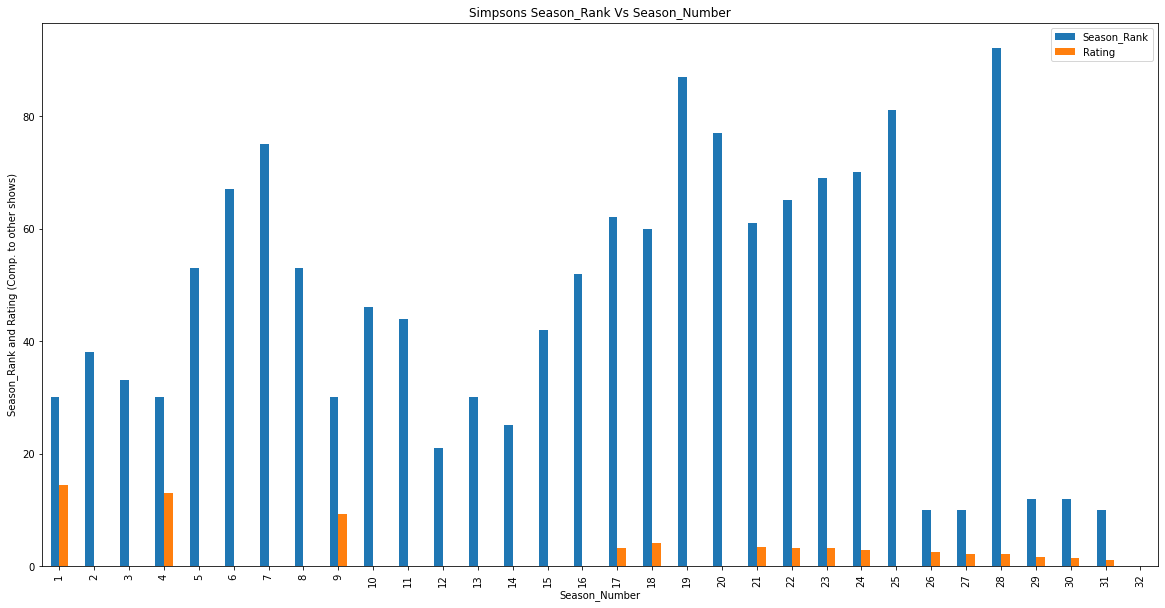

In [22]:
import matplotlib.pyplot as plt
#dental_health_df = country_badteeth_cleaned

#ax = dental_health_df.plot.bar(y = ["United States", "Russia", "China", "Canada", "Brazil"], rot=90, title="Dental Visits for 12 year olds per Country")

#ax.set_ylabel('Decayed, Missing, and Filled teeth (DMFT)')

#fig = ax.get_figure()

#fig.savefig('Images/DentalVisitsGraph.png')

ratingNormalized_df

#Season rank bar graph
#ax = ratingNormalized_df.plot.bar(x= "Season_Number", y = "Season_Rank", rot=90, title="Simpsons Season_Rank Vs Season_Number")

#fig = ax.get_figure()

ax = ratingNormalized_df.plot.bar(figsize=(20,10), x= "Season_Number", y = ["Season_Rank", "Rating"], rot=90, title="Simpsons Season_Rank Vs Season_Number")

ax.set_ylabel('Season_Rank and Rating (Comp. to other shows)')